¿Cómo funciona el modelo KNN?
El algoritmo K-NN (K Nearest Neighbors) o en español, K Vecinos Más Cercanos, trata de buscar los K puntos más cercanos a un punto concreto para poder inferir su valor. 

Este algoritmo pertenece al conjunto de técnicas del aprendizaje automático supervisado, y puede ser utilizado tanto para problemas de clasificación, como de regresión.

Fuente de la información: https://www.themachinelearners.com/algoritmo-knn/

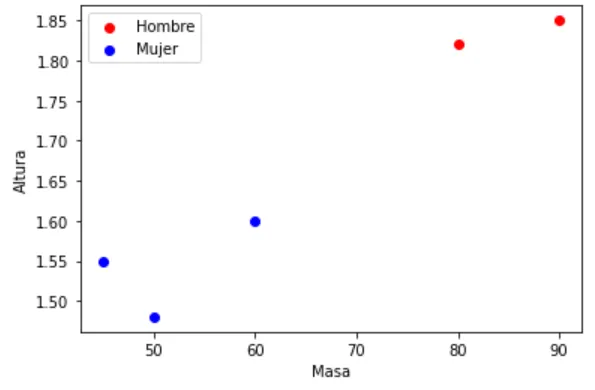

Si nos dieran datos de una sexta persona, pero no nos dieran su género, 

¿Podríamos adivinarlo de alguna forma? Aquí es donde entra la fuerza del algoritmo KNN. Como tenemos 5 personas, de las que sí conocemos su género, cogeremos K igual a 3, para coger los 3 puntos (o vecinos) más cercanos a nuestro nuevo punto negro. 

¿Por qué cogemos 3? Simplemente porque vamos a coger las categorías de los 3 elementos más cercanos y cogeremos la mayoría de estas categorías.
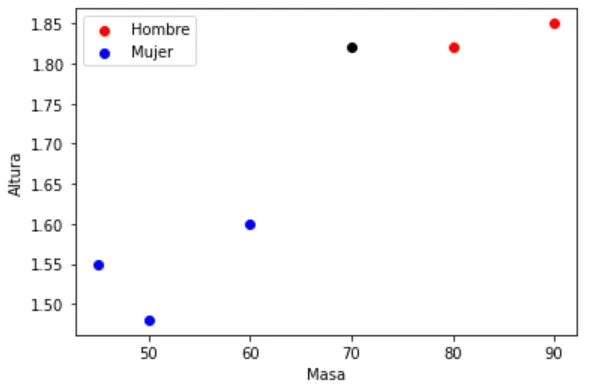

Funcionamiento paso a paso del algoritmo k-NN:

1º. Calcular la distancia de todos los elementos con nuestro punto
Tenemos que haber definido la función que vamos a utilizar para calcular la distancia. Lo más normal si trabajas con valores numéricos es utilizar la distancia euclídea.

2º. Ordenar las distancias de menor a mayor
Coloca todas las distancias de nuestro punto con el resto y ordénalos de menor a mayor, se hace así para saber cuáles son los más cercanos y los más alejados.

3º. Seleccionar los K elementos más cercanos
Una vez se ha definido el valor de K, nos quedamos con esta cantidad de valores, con la menor distancia. Que representa los valores más parecidos a nuestro punto.

4º. Obtenemos la predicción del algoritmo
En el caso de ser un problema de regresión, obtenemos la media de los K valores más cercanos, mientras que si fuera de clasificación, nos quedaríamos con la categoría más votada.



Lazy Learning: Compara como de parecidos son los puntos que conocemos, con los puntos nuevos, para obtener así una predicción.

Distancia: Si tenemos más de dos variables, sería imposible decir a ojo qué puntos están más cerca de otros. Necesitaríamos para esto un método para poder calcular la distancia entre los puntos.

Distancia Euclídea o distancia euclidiana:
Pensada solo para variables numéricas. 

This function is able to return one of eight different matrix norms, 
or one of an infinite number of vector norms (described below), 
depending on the value of the ord parameter.
https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html


La norma Euclidiana o norma L2 es como una regla que usamos para medir lo grande que es un vector (como una flecha en un dibujo). 

Imagina que tienes una flecha que apunta hacia arriba y mide 3 unidades de largo, y otra flecha que apunta hacia la derecha y mide 4 unidades de largo. La norma Euclidiana es como una regla que te dice cuán lejos están estas dos flechas si caminas directamente desde una a la otra. 

En este caso, la norma Euclidiana de estas dos flechas es de 5 unidades (porque 3 al cuadrado más 4 al cuadrado es 9 más 16, lo que da un total de 25, y la raíz cuadrada de 25 es 5). 

Entonces, la norma Euclidiana es una forma de medir lo largo que es un vector y cuán lejos están dos vectores entre sí.

In [66]:
#Calculando la distancia euclidiana en Python
import numpy as np
punto_1 = np.array([2, 4, 6])
punto_2 = np.array([3, 5, 7])
# Calculando la distancia euclidea
distancia_euclidea = np.linalg.norm(punto_1 - punto_2)
print(distancia_euclidea)

1.7320508075688772


Escalar variables:
Rango en 0 y 1, y otra con valores entre 0 y 1000, la segunda variable influiría mucho más que la primera en el cálculo de la distancia.

Usando el Clasificador KNN

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

Crearemos unos datos de prueba, de los que sabemos la categoría y creamos un punto nuevo, del que no sabemos su género y visualizamos todos los puntos

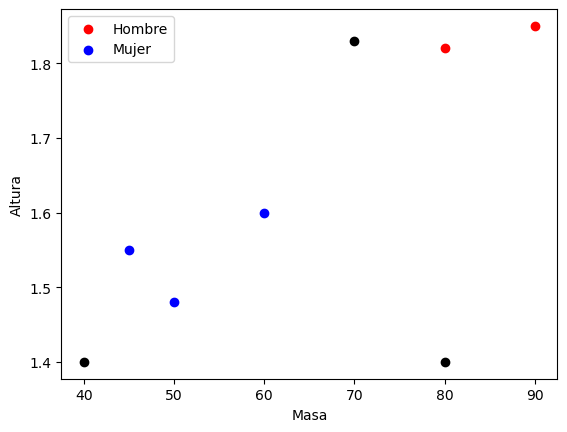

In [60]:
data = {'Masa': [50, 80, 90, 45, 60],
        'Altura': [1.48, 1.82, 1.85, 1.55, 1.60],
        'Genero': ['m', 'h', 'h', 'm', 'm']}

#Agregar nueva información:
punto_nuevo = {'Masa': [80],
               'Altura': [1.40]}
df = pd.DataFrame(data)
punto_nuevo = pd.DataFrame(punto_nuevo)

#Mas información agregada:
punto_nuevo1 = {'Masa': [70],
               'Altura': [1.83]}
df = pd.DataFrame(data)
punto_nuevo1 = pd.DataFrame(punto_nuevo1)

punto_nuevo2 = {'Masa': [40],
               'Altura': [1.40]}
df = pd.DataFrame(data)
punto_nuevo2 = pd.DataFrame(punto_nuevo2)

# sns.scatterplot(df['Masa'], df['Altura'], hue=df['sex'])


# Gráfico de dispersión
ax = plt.axes()
ax.scatter(df.loc[df['Genero'] == 'h', 'Masa'],
           df.loc[df['Genero'] == 'h', 'Altura'],
           c="red",
           label="Hombre")
ax.scatter(df.loc[df['Genero'] == 'm', 'Masa'],
           df.loc[df['Genero'] == 'm', 'Altura'],
           c="blue",
           label="Mujer")
ax.scatter(punto_nuevo['Masa'],
           punto_nuevo['Altura'],
           c="black")
#Agregamos información:
ax.scatter(punto_nuevo1['Masa'],
           punto_nuevo1['Altura'],
           c="black")
ax.scatter(punto_nuevo2['Masa'],
           punto_nuevo2['Altura'],
           c="black")

plt.xlabel("Masa")
plt.ylabel("Altura")
ax.legend()
plt.show()

Entrenamos el algoritmo KNN con los datos para los que tenemos etiquetas. Posteriormente predecimos la clase del punto para el que no tenemos etiqueta.

In [61]:
from sklearn.neighbors import KNeighborsClassifier

# Ajuste del modelo y predicción
knn = KNeighborsClassifier(n_neighbors=3)
X = df[['Masa', 'Altura']]
y = df[['Genero']]

knn.fit(X, y)

#Prediciones sujetos:
prediccion = knn.predict(punto_nuevo)
prediccion1 = knn.predict(punto_nuevo1)
prediccion2 = knn.predict(punto_nuevo2)

#Omitir Error uso Ravel().
print("Predicion Sujeto 1 (H= Hombre | M= Mujer) :: "+prediccion)
print("Predicion Sujeto 2 (H= Hombre | M= Mujer) :: "+prediccion2)
print("Predicion Sujeto 3 (H= Hombre | M= Mujer) :: "+prediccion2)

['Predicion Sujeto 1 (H= Hombre | M= Mujer) :: h']
['Predicion Sujeto 2 (H= Hombre | M= Mujer) :: m']
['Predicion Sujeto 3 (H= Hombre | M= Mujer) :: m']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode